In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [16]:
path_processed = '../data/processed/'
clases = ['basal', 'adelante', 'atras', 'derecha', 'izquierda', 'reposo']

# --- CONFIGURACIÓN ---
# Cambia a None para el primer sujeto, o 2, 3, etc. para otros
sujeto_id =1 

# --- Lógica de Carga Dinámica ---
if sujeto_id is None:
    # Para el primer sujeto, que no tenía identificador en el nombre
    id_archivo = ''
    print("Cargando datos del sujeto original...")
else:
    # Para los nuevos sujetos, creamos un identificador formateado
    # :02d formatea el número a 2 dígitos (ej. 2 -> '02', 10 -> '10')
    id_archivo = f"_sujeto_{sujeto_id:02d}"
    print(f"Cargando datos para el sujeto con id: '{id_archivo}'")

# El diccionario por comprensión ahora es más simple y funciona para ambos casos
dataframes = {clase: pd.read_parquet(f'{path_processed}{clase}_data{id_archivo}.parquet') for clase in clases}

# Verificamos que se cargaron bien
print("Datos cargados exitosamente.")
print(f"Muestras en el segmento 'adelante': {dataframes['adelante'].shape[0]}")

Cargando datos para el sujeto con id: '_sujeto_01'
Datos cargados exitosamente.
Muestras en el segmento 'adelante': 15360


In [17]:
dataframes_1=dataframes

In [18]:
path_processed = '../data/processed/'
clases = ['basal', 'adelante', 'atras', 'derecha', 'izquierda', 'reposo']

# --- CONFIGURACIÓN ---
# Cambia a None para el primer sujeto, o 2, 3, etc. para otros
sujeto_id =2 

# --- Lógica de Carga Dinámica ---
if sujeto_id is None:
    # Para el primer sujeto, que no tenía identificador en el nombre
    id_archivo = ''
    print("Cargando datos del sujeto original...")
else:
    # Para los nuevos sujetos, creamos un identificador formateado
    # :02d formatea el número a 2 dígitos (ej. 2 -> '02', 10 -> '10')
    id_archivo = f"_sujeto_{sujeto_id:02d}"
    print(f"Cargando datos para el sujeto con id: '{id_archivo}'")

# El diccionario por comprensión ahora es más simple y funciona para ambos casos
dataframes = {clase: pd.read_parquet(f'{path_processed}{clase}_data{id_archivo}.parquet') for clase in clases}

# Verificamos que se cargaron bien
print("Datos cargados exitosamente.")
print(f"Muestras en el segmento 'adelante': {dataframes['adelante'].shape[0]}")

Cargando datos para el sujeto con id: '_sujeto_02'
Datos cargados exitosamente.
Muestras en el segmento 'adelante': 15360


In [5]:
dataframes_2=dataframes

In [19]:
# Identificar las columnas de señales (asumimos que son las mismas en todos los DFs)
signal_cols = [col for col in dataframes_1['basal'].columns if 'EXG Channel' in col]

# Crear una instancia del escalador
scaler = StandardScaler()

# Iterar sobre cada DataFrame en nuestro diccionario para normalizarlo
for clase, df in dataframes_1.items():
    print(f"Normalizando el segmento: {clase}")
    
    # Seleccionar solo las columnas de señal
    df_signals = df[signal_cols]
    
    # Ajustar y transformar los datos
    df_scaled_signals = scaler.fit_transform(df_signals)
    
    # Reemplazar las columnas originales con las normalizadas
    df[signal_cols] = df_scaled_signals

print("\n¡Todos los segmentos han sido normalizados!")

Normalizando el segmento: basal
Normalizando el segmento: adelante
Normalizando el segmento: atras
Normalizando el segmento: derecha
Normalizando el segmento: izquierda
Normalizando el segmento: reposo

¡Todos los segmentos han sido normalizados!


In [20]:
# Identificar las columnas de señales (asumimos que son las mismas en todos los DFs)
signal_cols = [col for col in dataframes_2['basal'].columns if 'EXG Channel' in col]

# Crear una instancia del escalador
scaler = StandardScaler()

# Iterar sobre cada DataFrame en nuestro diccionario para normalizarlo
for clase, df in dataframes_2.items():
    print(f"Normalizando el segmento: {clase}")
    
    # Seleccionar solo las columnas de señal
    df_signals = df[signal_cols]
    
    # Ajustar y transformar los datos
    df_scaled_signals = scaler.fit_transform(df_signals)
    
    # Reemplazar las columnas originales con las normalizadas
    df[signal_cols] = df_scaled_signals


Normalizando el segmento: basal
Normalizando el segmento: adelante
Normalizando el segmento: atras
Normalizando el segmento: derecha
Normalizando el segmento: izquierda
Normalizando el segmento: reposo


In [23]:
def calcular_features_rms_wl(df, window_size=50):
    """
    Toma un DataFrame de señales y calcula RMS y WL para cada canal.
    """
    df_features = df.copy()
    signal_cols = [col for col in df.columns if 'EXG Channel' in col]
    
    print(f"Calculando RMS y WL para {len(signal_cols)} canales...")
    
    for col in signal_cols:
        # --- Calcular RMS (Root Mean Square) ---
        df_features[f'RMS_{col}'] = np.sqrt(
            (df_features[col]**2)
            .rolling(window=window_size, min_periods=1)
            .mean()
        )
        
        # --- Calcular WL (Waveform Length) ---
        diferencias_abs = df_features[col].diff().abs()
        df_features[f'WL_{col}'] = diferencias_abs.rolling(window=window_size, min_periods=1).sum()
        
    print("¡Cálculo completado!")
    return df_features

Calculando RMS y WL para 8 canales...
¡Cálculo completado!
Calculando RMS y WL para 8 canales...
¡Cálculo completado!
Calculando RMS y WL para 8 canales...
¡Cálculo completado!
Calculando RMS y WL para 8 canales...
¡Cálculo completado!
Calculando RMS y WL para 8 canales...
¡Cálculo completado!


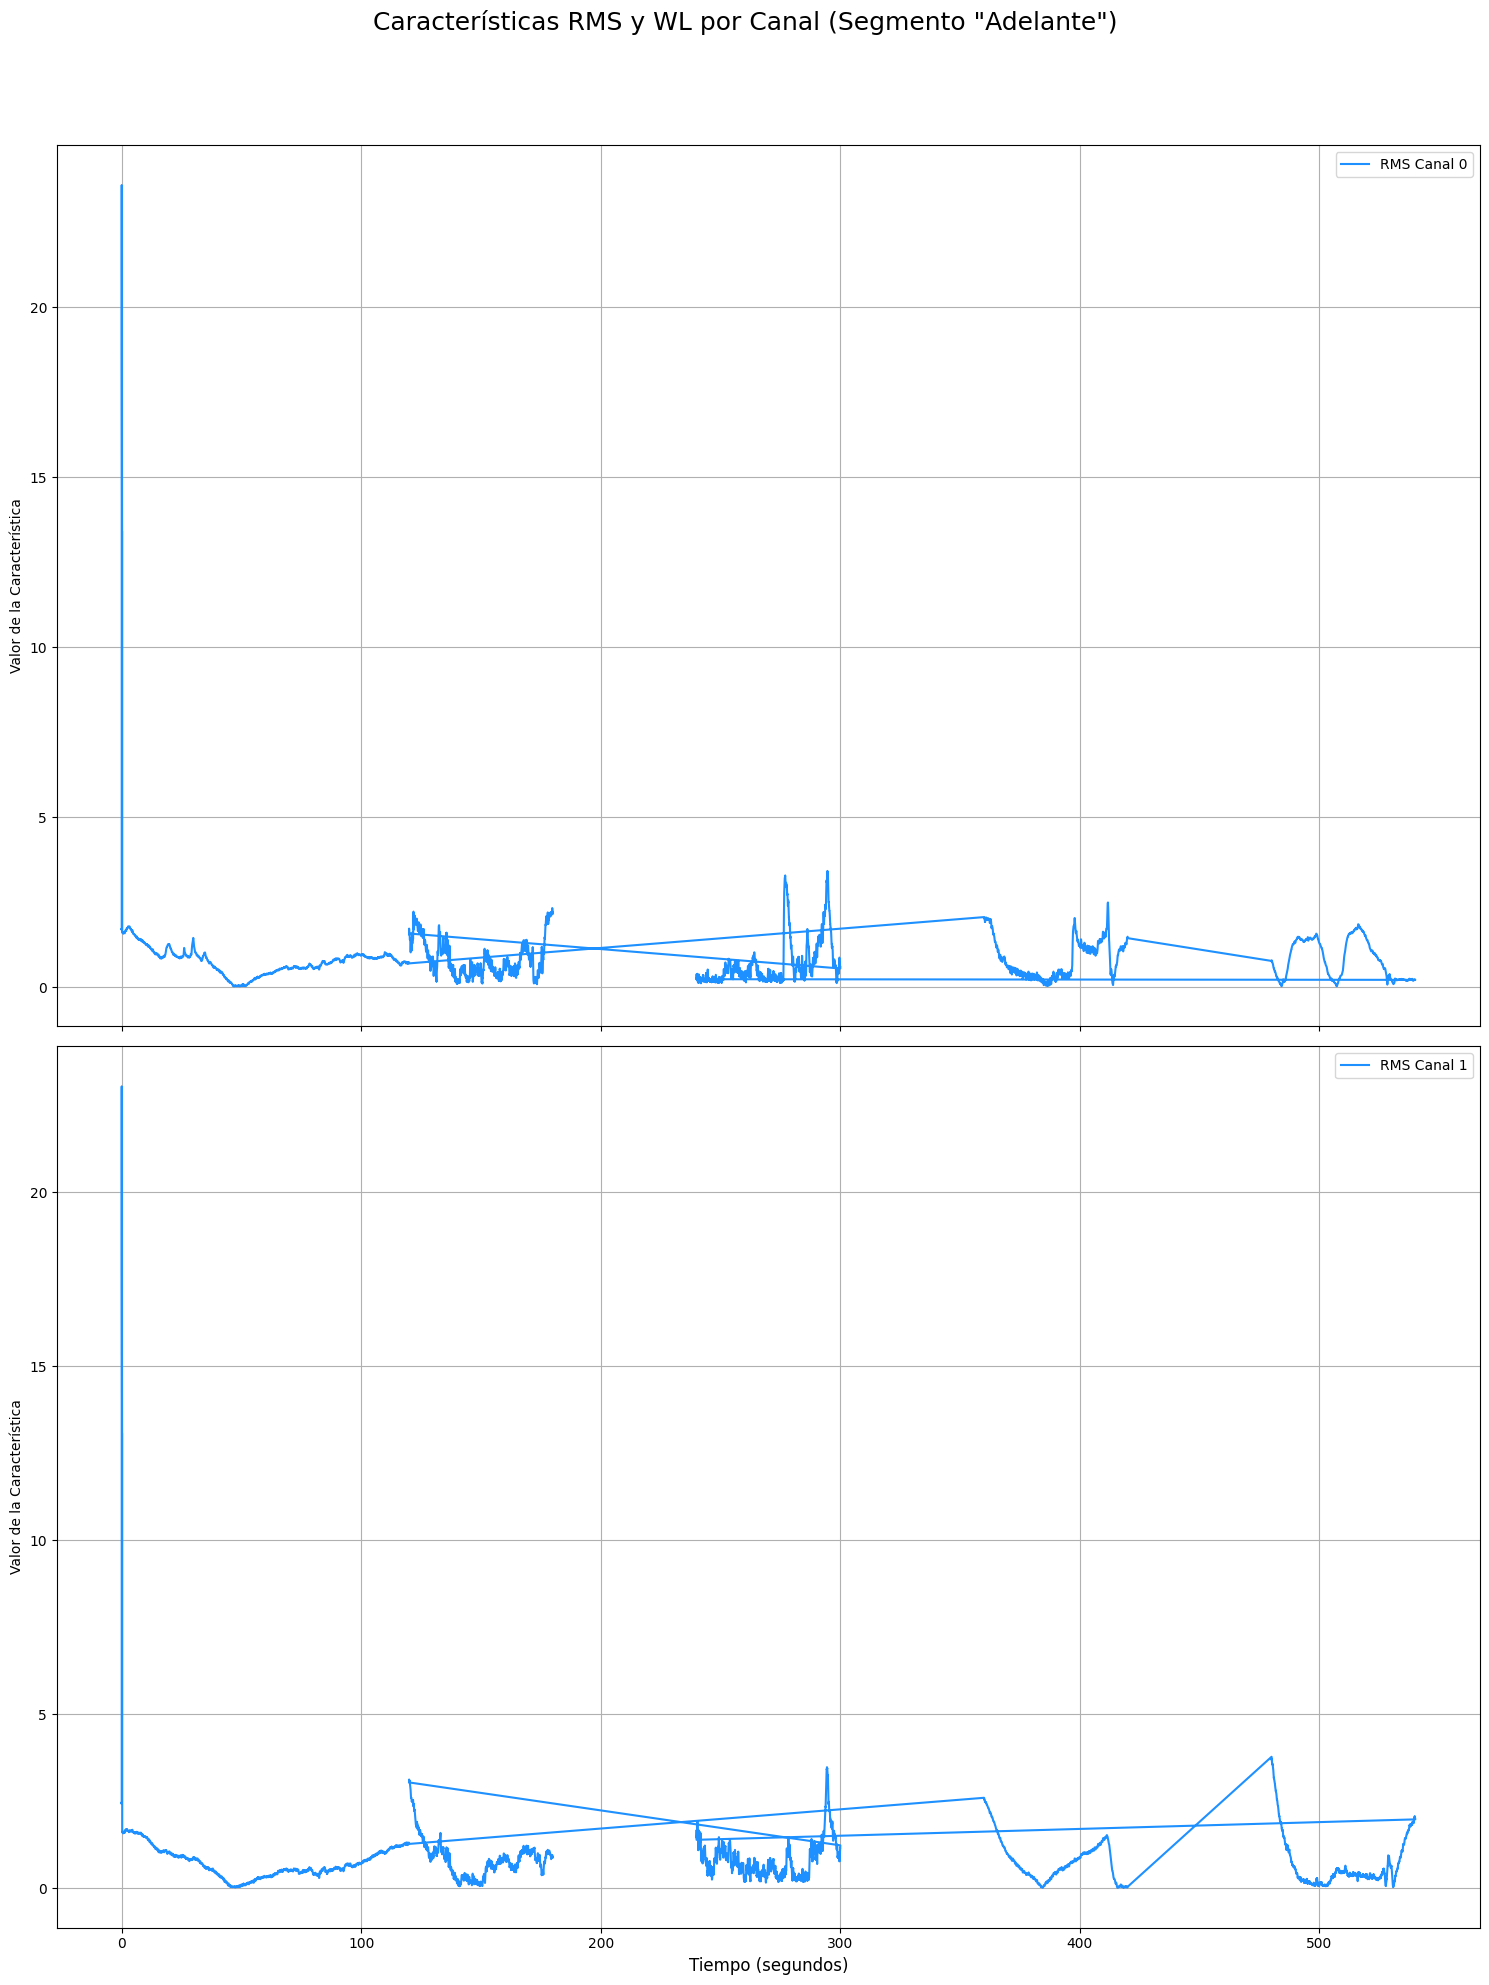

In [28]:
# --- Visualización de Características por Canal ---
# Vamos a usar el DataFrame del segmento 'adelante' que ya tiene las features calculadas
# (Asegúrate de haber corrido la celda que normaliza y calcula las features primero)

# Aplicamos la función para tener el DataFrame con características
df_basal_features = calcular_features_rms_wl(dataframes_1['basal'])
df_adelante_features = calcular_features_rms_wl(dataframes_1['adelante'])
df_atras_features = calcular_features_rms_wl(dataframes_1['atras'])
df_izquierda_features = calcular_features_rms_wl(dataframes_1['izquierda'])
df_derecha_features = calcular_features_rms_wl(dataframes_1['derecha'])
list_all_df=[df_basal_features,
            df_adelante_features,
            df_atras_features,
            df_izquierda_features,
            df_derecha_features]
df_all_data=pd.concat(list_all_df, ignore_index=True)

# Número de canales a graficar
num_channels = 2 # Asumiendo que tienes del canal 0 al 7

# Crear una figura con 8 subgráficos apilados verticalmente
fig, axes = plt.subplots(num_channels, 1, figsize=(15, 20), sharex=True)

# Título general para toda la figura
fig.suptitle('Características RMS y WL por Canal (Segmento "Adelante")', fontsize=18, y=1.02)

for i in range(num_channels):
    # Seleccionar el subgráfico (eje) actual
    ax = axes[i]
    
    # Nombres de las columnas para este canal
    rms_col = f'RMS_EXG Channel {i}'
    wl_col = f'WL_EXG Channel {i}'
    
    # Graficar RMS vs Tiempo
    ax.plot(df_all_data['time_seconds'], df_all_data[rms_col], label=f'RMS Canal {i}', color='dodgerblue')
    
    # Graficar WL vs Tiempo
    #ax.plot(df_all_data['time_seconds'], df_all_data[wl_col], label=f'WL Canal {i}', color='orangered', linestyle='--')
    
    # Personalización de cada subgráfico
    ax.set_ylabel('Valor de la Característica')
    ax.grid(True)
    ax.legend()

# Añadir la etiqueta del eje X solo al último gráfico
axes[-1].set_xlabel('Tiempo (segundos)', fontsize=12)

# Ajustar el espaciado para que no se superpongan los títulos
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()